## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [5]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
type(boston)

sklearn.utils.Bunch

In [9]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['target'])
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [110]:
# MinMaxScaler() Для каждой фичи x делает: (x - min) / (max - min) -> [0, 1]
# StandardScaler() Для каждой фичи х делает: (x - mean) / std      -> mean = 0, std = 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns=boston['feature_names'])
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns=boston['feature_names'])

In [111]:
from sklearn.manifold import TSNE

In [112]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


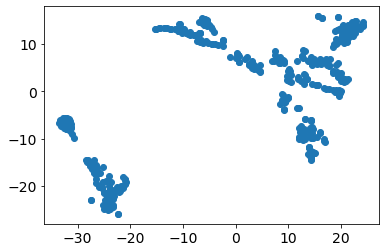

In [113]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [13]:
X_train_tsne

array([[-2.69763165e+01, -1.73295670e+01],
       [ 1.87652798e+01,  9.91632748e+00],
       [ 9.93525124e+00,  4.25393295e+00],
       [-3.19705009e+01, -5.75354338e+00],
       [ 2.00251522e+01,  1.13311558e+01],
       [ 1.37948856e+01,  6.45354366e+00],
       [ 1.41759195e+01, -7.81901217e+00],
       [ 4.70692682e+00,  4.01065302e+00],
       [-3.16553650e+01, -5.95148420e+00],
       [-3.10326996e+01, -9.09198475e+00],
       [ 1.42084274e+01, -8.30438995e+00],
       [ 1.40299044e+01, -1.20190277e+01],
       [ 2.03477650e+01,  1.40638981e+01],
       [-3.13375435e+01, -7.69089746e+00],
       [ 1.46604881e+01, -1.27253418e+01],
       [ 1.63503838e+01,  1.55449629e+01],
       [-4.48089457e+00,  1.00628977e+01],
       [ 1.02825994e+01,  4.35269022e+00],
       [ 1.94017696e+01,  1.56085882e+01],
       [ 8.83399677e+00,  6.59980822e+00],
       [-3.35469742e+01, -6.64120483e+00],
       [-5.03217268e+00,  1.39546633e+01],
       [ 1.44117241e+01, -6.15662146e+00],
       [ 1.

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [1]:
from sklearn.cluster import KMeans 

In [2]:
?KMeans

In [3]:
model = KMeans(n_clusters=3, max_iter=100, random_state=100)

In [107]:
train_labels = model.fit_predict(X_train_tsne)

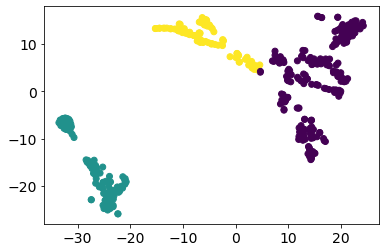

In [108]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [118]:
X_train = X_train.reset_index()

In [125]:
y_train = y_train.reset_index()

In [120]:
X_train['train_labels'] = pd.Series(train_labels)

In [131]:
X_train['price'] = y_train['target']

In [132]:
X_train

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,train_labels,price
0,477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1,12.0
1,15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,0,19.9
2,332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,0,19.4
3,423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1,13.4
4,19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,0,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,2,19.5
400,270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,0,21.1
401,348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,0,24.5
402,435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,1,13.4


In [149]:
for i in range(3):
    avg_CRIM = X_train.loc[X_train['train_labels']==i, 'CRIM'].mean()
    avg_price = X_train.loc[X_train['train_labels']==i, 'price'].mean()
    print(f'Среднее значение CRIM в кластере {i}:  {avg_CRIM}')
    print(f'Среднее значение price в кластере {i}:  {avg_price}')

Среднее значение CRIM в кластере 0:  0.25713341346153823
Среднее значение price в кластере 0:  25.91442307692308
Среднее значение CRIM в кластере 1:  12.804150384615385
Среднее значение price в кластере 1:  16.225000000000005
Среднее значение CRIM в кластере 2:  0.7931626086956518
Среднее значение price в кластере 2:  23.176086956521736


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [150]:
test_labels = model.fit_predict(X_test_scaled)

In [151]:
X_test = X_test.reset_index()
y_test = y_test.reset_index()

In [152]:
X_test['test_labels'] = pd.Series(test_labels)
X_test['price'] = y_test['target']

In [154]:
for i in range(3):
    avg_CRIM = X_test.loc[X_test['test_labels']==i, 'CRIM'].mean()
    avg_price = X_test.loc[X_test['test_labels']==i, 'price'].mean()
    print(f'Среднее значение CRIM в кластере {i}:  {avg_CRIM}')
    print(f'Среднее значение price в кластере {i}:  {avg_price}')

Среднее значение CRIM в кластере 0:  0.2464211594202899
Среднее значение price в кластере 0:  23.911594202898552
Среднее значение CRIM в кластере 1:  8.469301923076923
Среднее значение price в кластере 1:  17.39230769230769
Среднее значение CRIM в кластере 2:  19.021665714285714
Среднее значение price в кластере 2:  12.814285714285713
